# $\varepsilon$ -DP

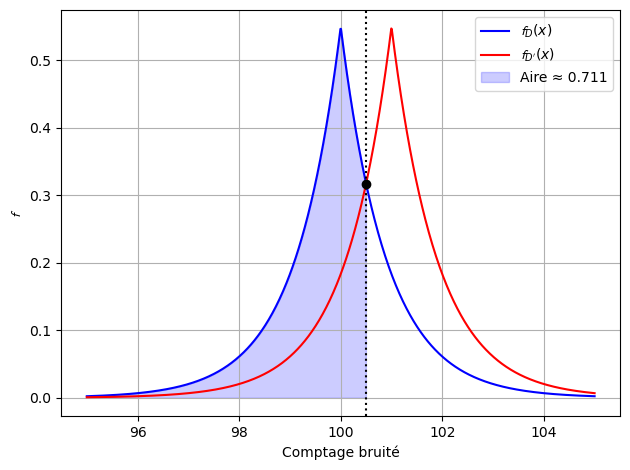

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Paramètres
mu1, mu2 = 100, 101
b = 1 / np.log(3)

# Axe des x
x = np.linspace(95, 105, 1000)

# Densités
y1 = laplace.pdf(x, loc=mu1, scale=b)
y2 = laplace.pdf(x, loc=mu2, scale=b)

# Point limite pour l’aire
x_limit = 100.5
idx_limit = np.where(x <= x_limit)

# Tracé des courbes
plt.plot(x, y1, label=r"$\mathcal{f}_D(x)$", color='blue')
plt.plot(x, y2, label=r"$\mathcal{f}_{D'}(x)$", color='red')

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(x[idx_limit], y1[idx_limit], color='blue', alpha=0.2, label=f"Aire ≈ 0.711")

# Tracer les lignes pointillées
plt.plot(x_limit, laplace.pdf(x_limit, loc=mu1, scale=b), 'o', color='black')
plt.axvline(x=x_limit, linestyle='dotted', color='black')

# Mise en forme
plt.xlabel("Comptage bruité")
plt.ylabel(r"$\mathcal{f}$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

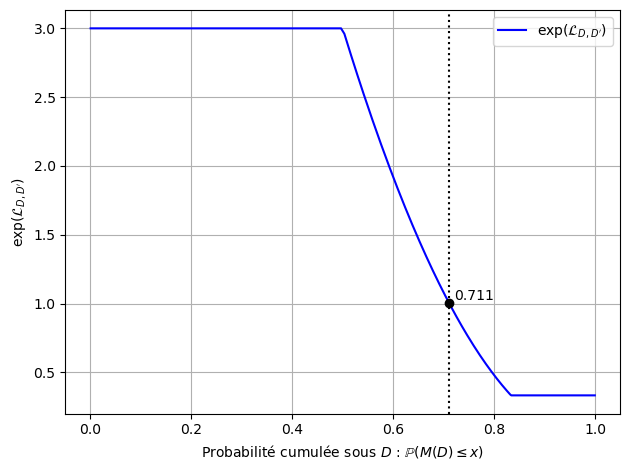

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Paramètres
mu1, mu2 = 100, 101
b = 1 / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = laplace.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = laplace.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = laplace.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

# Trouver le point où exp(𝓛) est le plus proche de 0 (le plus petit)
idx_min = np.argmin(np.abs(ratio -1))
x_min = x[idx_min]
cdf_min = cdf_y1[idx_min]
y_min = ratio[idx_min]

# Tracé
plt.plot(cdf_y1, ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

# Ligne pointillée verticale depuis l’axe des x
plt.axvline(x=cdf_min, linestyle='dotted', color='black')
plt.plot(cdf_min, y_min, 'o', color='black')
plt.text(cdf_min + 0.01, y_min, f"{cdf_min:.3f}", verticalalignment='bottom', color='black')

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$\exp(\mathcal{L}_{D, D'})$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ($\varepsilon, \delta$) -DP

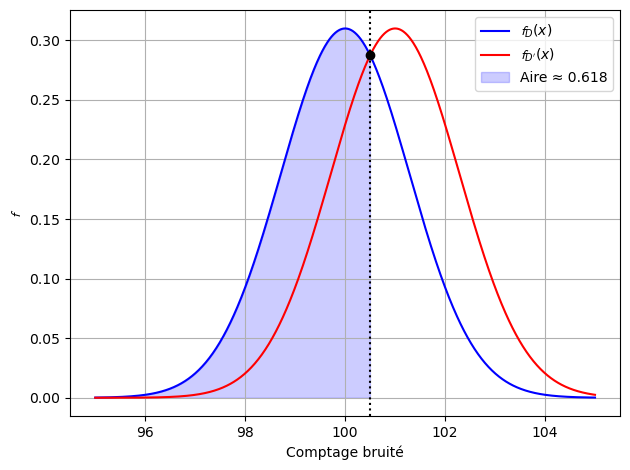

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x
x = np.linspace(95, 105, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)
y2 = norm.pdf(x, loc=mu2, scale=b)

# Point limite pour l’aire
x_limit = 100.5
idx_limit = np.where(x <= x_limit)

# Tracé des courbes
plt.plot(x, y1, label=r"$\mathcal{f}_D(x)$", color='blue')
plt.plot(x, y2, label=r"$\mathcal{f}_{D'}(x)$", color='red')

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(x[idx_limit], y1[idx_limit], color='blue', alpha=0.2, label=f"Aire ≈ 0.618")

# Tracer les lignes pointillées
plt.plot(x_limit, norm.pdf(x_limit, loc=mu1, scale=b), 'o', color='black')
plt.axvline(x=x_limit, linestyle='dotted', color='black')

# Mise en forme
plt.xlabel("Comptage bruité")
plt.ylabel(r"$\mathcal{f}$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

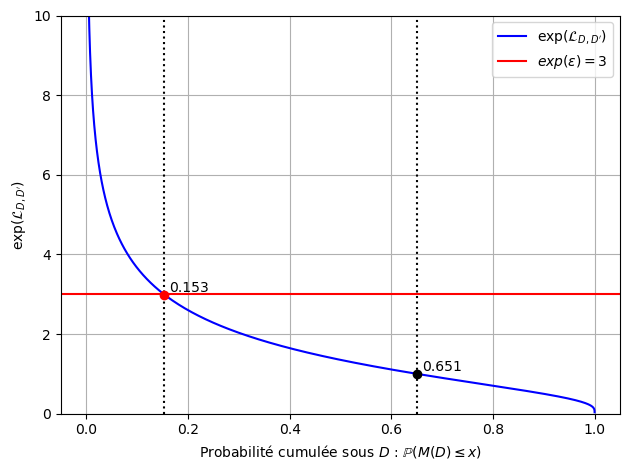

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = norm.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = norm.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

# Trouver le point où exp(𝓛) est le plus proche de 0 (le plus petit)
idx_min = np.argmin(np.abs(ratio -1))
x_min = x[idx_min]
cdf_min = cdf_y1[idx_min]
y_min = ratio[idx_min]

idx_min_2 = np.argmin(np.abs(ratio -3))
x_min_2 = x[idx_min_2]
cdf_min_2 = cdf_y1[idx_min_2]
y_min_2 = ratio[idx_min_2]

# Tracé
plt.plot(cdf_y1, ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

# Ligne pointillée verticale depuis l’axe des x
plt.axvline(x=cdf_min, linestyle='dotted', color='black')
plt.plot(cdf_min, y_min, 'o', color='black')
plt.text(cdf_min + 0.01, y_min, f"{cdf_min:.3f}", verticalalignment='bottom', color='black')

plt.axhline(y=3, color='red', label=r"$exp(\varepsilon) = 3$")

plt.axvline(x=cdf_min_2, linestyle='dotted', color='black')
plt.plot(cdf_min_2, y_min_2, 'o', color='red')
plt.text(cdf_min_2 + 0.01, y_min_2, f"{cdf_min_2:.3f}", verticalalignment='bottom', color='black')

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$\exp(\mathcal{L}_{D, D'})$")
plt.ylim(0,10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


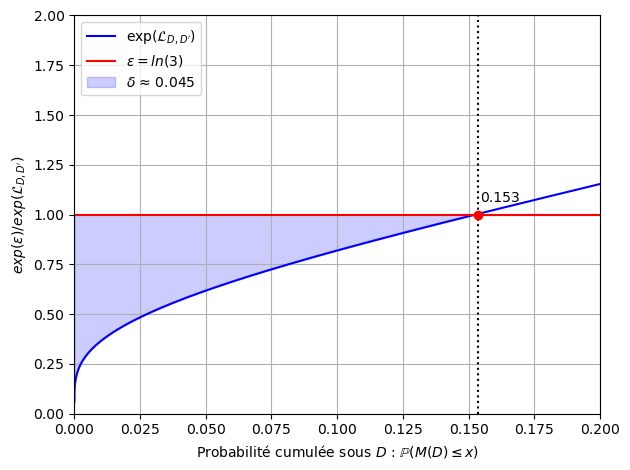

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = norm.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = norm.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

idx_min_2 = np.argmin(np.abs(ratio -3))
x_min_2 = x[idx_min_2]
cdf_min_2 = cdf_y1[idx_min_2]
y_min_2 = ratio[idx_min_2]

# Tracé
plt.plot(cdf_y1, 3/ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

plt.axhline(y=1, color='red', label=r"$\varepsilon = ln(3)$")
plt.axvline(x=cdf_min_2, linestyle='dotted', color='black')
plt.plot(cdf_min_2, 1, 'o', color='red')
plt.text(cdf_min_2 + 0.001, 1+0.05, f"{cdf_min_2:.3f}", verticalalignment='bottom', color='black')

area = np.trapezoid(1 - 3/ratio[:idx_min_2], cdf_y1[:idx_min_2])

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(cdf_y1[1:idx_min_2], y1= 3/ratio[1:idx_min_2], y2= 1, color='blue', alpha=0.2, label=rf"$\delta$ ≈ {area:.3f}")

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$exp(\varepsilon)/exp(\mathcal{L}_{D, D'})$")
plt.xlim(0,0.2)
plt.ylim(0,2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Composition

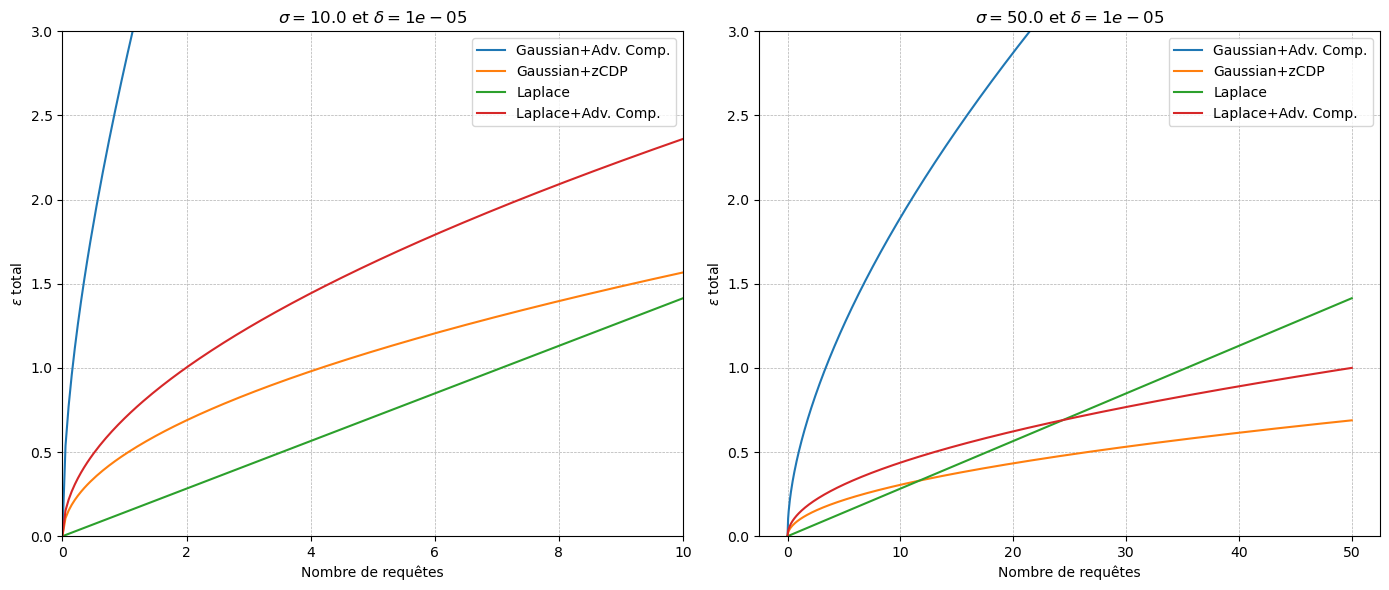

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

# Paramètres
delta = 1e-5
xs = np.linspace(0, 50, 1000)
delta_gauss = delta / (xs + 1)

# Cas sigma = 10
sigma_1 = 10.0
gauss_eps_1 = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma_1
ys_gauss_adv_1 = [
    gauss_eps_1[i] * np.sqrt(2 * xs[i] * np.log(1 / delta_gauss[i])) + xs[i] * gauss_eps_1[i] * (np.exp(gauss_eps_1[i]) - 1)
    for i in range(len(xs))
]

rho_1 = 1 / (2 * sigma_1**2)
ys_gauss_zcdp_1 = [(k * rho_1) + 2 * np.sqrt((k * rho_1) * np.log(1 / delta)) for k in xs]

lap_eps_1 = np.sqrt(2) / sigma_1
ys_lap_1 = [k * lap_eps_1 for k in xs]
ys_lap_adv_1 = [
    lap_eps_1 * np.sqrt(2 * k * np.log(1 / delta)) + k * lap_eps_1 * (np.exp(lap_eps_1) - 1)
    for k in xs
]

# Cas sigma = 50
sigma_2 = 50.0
gauss_eps_2 = np.sqrt(2 * np.log(1.25 / delta_gauss)) / sigma_2
ys_gauss_adv_2 = [
    gauss_eps_2[i] * np.sqrt(2 * xs[i] * np.log(1 / delta_gauss[i])) + xs[i] * gauss_eps_2[i] * (np.exp(gauss_eps_2[i]) - 1)
    for i in range(len(xs))
]

rho_2 = 1 / (2 * sigma_2**2)
ys_gauss_zcdp_2 = [(k * rho_2) + 2 * np.sqrt((k * rho_2) * np.log(1 / delta)) for k in xs]
lap_eps_2 = np.sqrt(2) / sigma_2
ys_lap_2 = [k * lap_eps_2 for k in xs]
ys_lap_adv_2 = [
    lap_eps_2 * np.sqrt(2 * k * np.log(1 / delta)) + k * lap_eps_2 * (np.exp(lap_eps_2) - 1)
    for k in xs
]

# Création des graphiques côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour sigma = 10
axs[0].plot(xs, ys_gauss_adv_1, label="Gaussian+Adv. Comp.")
axs[0].plot(xs, ys_gauss_zcdp_1, label="Gaussian+zCDP")
axs[0].plot(xs, ys_lap_1, label="Laplace")
axs[0].plot(xs, ys_lap_adv_1, label="Laplace+Adv. Comp.")
axs[0].set_xlabel('Nombre de requêtes')
axs[0].set_xlim(0, 10)
axs[0].set_ylabel(r'$\epsilon$ total')
axs[0].set_ylim(0, 3.0)
axs[0].set_title(rf'$\sigma={sigma_1}$ et $\delta={delta}$')
axs[0].legend()
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Graphique pour sigma = 50
axs[1].plot(xs, ys_gauss_adv_2, label="Gaussian+Adv. Comp.")
axs[1].plot(xs, ys_gauss_zcdp_2, label="Gaussian+zCDP")
axs[1].plot(xs, ys_lap_2, label="Laplace")
axs[1].plot(xs, ys_lap_adv_2, label="Laplace+Adv. Comp.")
axs[1].set_xlabel('Nombre de requêtes')
axs[1].set_ylabel(r'$\epsilon$ total')
axs[1].set_ylim(0, 3.0)
axs[1].set_title(rf'$\sigma={sigma_2}$ et $\delta={delta}$')
axs[1].legend()
axs[1].grid(True, linestyle='--', linewidth=0.5)

# Affichage
plt.tight_layout()
plt.show()

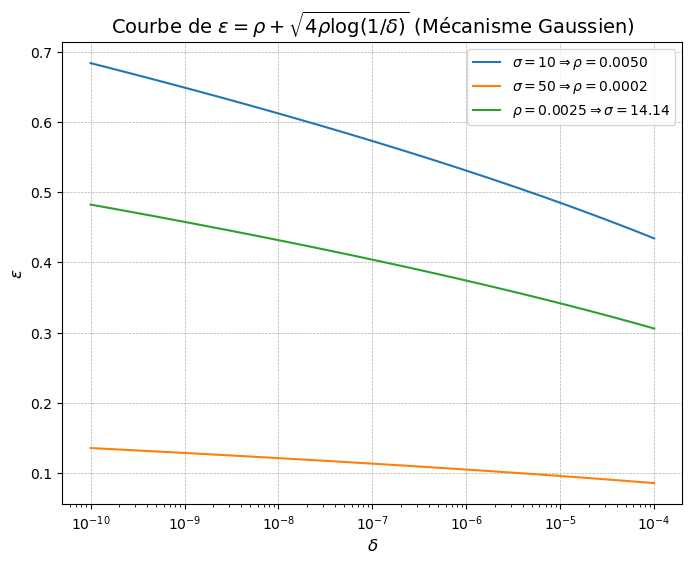

In [10]:
# Plage de valeurs pour delta (échelle logarithmique)
delta_values = np.logspace(-10, -4, 100)

# Définition des écarts types
sigma_1 = 10
sigma_2 = 50

# Calcul de rho en fonction de sigma
rho_1 = 1 / (2 * sigma_1**2)
rho_2 = 1 / (2 * sigma_2**2)
rho_3 = 0.0025  # Nouvelle valeur de rho
sigma_3 = 1 / np.sqrt(2 * rho_3)

# Calcul de epsilon avec la formule avancée
epsilon_values_1 = rho_1 + np.sqrt(4 * rho_1 * np.log(1 / delta_values))
epsilon_values_2 = rho_2 + np.sqrt(4 * rho_2 * np.log(1 / delta_values))
epsilon_values_3 = rho_3 + np.sqrt(4 * rho_3 * np.log(1 / delta_values))

# Création du graphique
plt.figure(figsize=(8, 6))

# Tracé des courbes pour sigma_1, sigma_2 et rho_3
plt.plot(delta_values, epsilon_values_1, label=rf'$\sigma = {sigma_1} \Rightarrow \rho = {rho_1:.4f}$')
plt.plot(delta_values, epsilon_values_2, label=rf'$\sigma = {sigma_2} \Rightarrow \rho = {rho_2:.4f}$')
plt.plot(delta_values, epsilon_values_3, label=rf'$\rho = {rho_3:.4f} \Rightarrow \sigma = {sigma_3:.2f}$')

# Personnalisation du graphique
plt.xscale("log")
plt.xlabel(r'$\delta$', fontsize=12)
plt.ylabel(r'$\varepsilon$', fontsize=12)
plt.title(r'Courbe de $\varepsilon = \rho + \sqrt{4\rho \log(1/\delta)}$ (Mécanisme Gaussien)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

In [6]:
# Paramètres de la loi normale
mu = 0  # Espérance nulle
sigma_values = [10, 50]

for sigma in sigma_values:
    # Calcul des bornes de l'intervalle de confiance à 95%
    lower_bound, upper_bound = norm.ppf([0.025, 0.975], mu, sigma)
    
    # Calcul de la taille de l'intervalle
    interval_size = upper_bound - lower_bound
    print(f"Taille de l'intervalle de confiance à 95% pour sigma = {sigma}: {interval_size}")

    # Paramètre b pour la loi de Laplace (b = sigma / sqrt(2))
    b = sigma / np.sqrt(2)
    
    # Calcul des bornes de l'intervalle de confiance à 95% pour la distribution Laplace
    lower_bound_laplace, upper_bound_laplace = laplace.ppf([0.025, 0.975], loc=mu, scale=b)
    
    # Calcul de la taille de l'intervalle de confiance
    interval_size_laplace = upper_bound_laplace - lower_bound_laplace
    print(f"Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = {sigma}: {interval_size_laplace}")

Taille de l'intervalle de confiance à 95% pour sigma = 10: 39.199279690801085
Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = 10: 42.3660521049884
Taille de l'intervalle de confiance à 95% pour sigma = 50: 195.99639845400543
Taille de l'intervalle de confiance à 95% pour Laplacien avec sigma = 50: 211.83026052494196


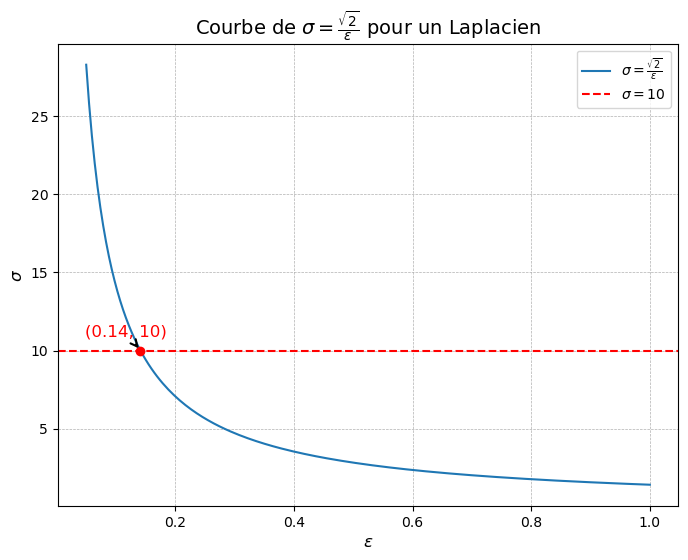

In [11]:
# Plage de valeurs pour epsilon
eps = np.linspace(0.05, 1, 200)

# Calcul des valeurs de sigma
sigma_values = np.sqrt(2) / eps

# Définition de sigma = 10 et calcul de epsilon correspondant
sigma_target = 10
epsilon_target = np.sqrt(2) / sigma_target

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(eps, sigma_values, label=r'$\sigma = \frac{\sqrt{2}}{\varepsilon}$')

# Ajout d'une ligne horizontale pour sigma = 10
plt.axhline(y=sigma_target, color='r', linestyle='--', label=r'$\sigma = 10$')

# Mise en évidence du point correspondant sur la courbe
plt.scatter(epsilon_target, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({epsilon_target:.2f}, {sigma_target})', 
    xy=(epsilon_target, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)

# Personnalisation du graphique
plt.xlabel(r'$\varepsilon$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.title(r'Courbe de $\sigma = \frac{\sqrt{2}}{\varepsilon}$ pour un Laplacien', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

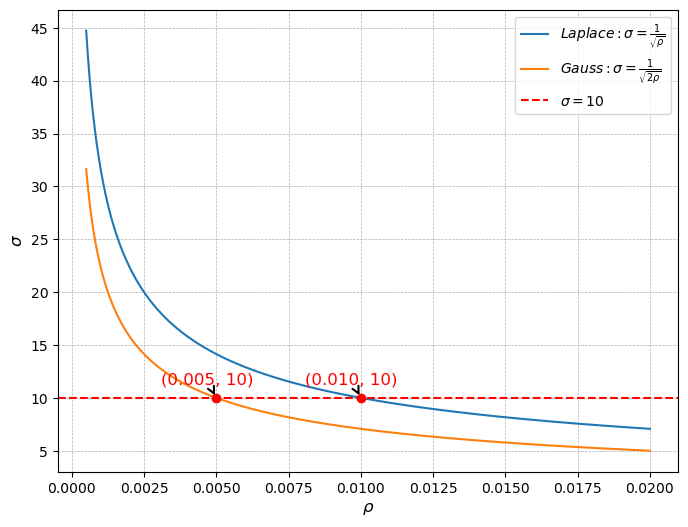

In [24]:
# Plage de valeurs pour epsilon
rho = np.linspace(0.0005, 0.02, 1000)

# Calcul des valeurs de sigma
sigma_values_laplace = 1 / np.sqrt(rho)

sigma_values_gauss = 1 / np.sqrt(2*rho)

# Définition de sigma = 10 et calcul de epsilon correspondant
sigma_target = 10
rho_target_laplace = 1 / sigma_target**2
rho_target_gauss = 1 / (2* sigma_target**2)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(rho, sigma_values_laplace, label=r'$ Laplace : \sigma = \frac{1}{\sqrt{\rho}}$')
plt.plot(rho, sigma_values_gauss, label=r'$ Gauss : \sigma = \frac{1}{\sqrt{2\rho}}$')

# Ajout d'une ligne horizontale pour sigma = 10
plt.axhline(y=sigma_target, color='r', linestyle='--', label=r'$\sigma = 10$')

# Mise en évidence du point correspondant sur la courbe
plt.scatter(rho_target_laplace, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({rho_target_laplace:.3f}, {sigma_target})', 
    xy=(rho_target_laplace, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)

plt.scatter(rho_target_gauss, sigma_target, color='red', zorder=3)
plt.annotate(
    f'({rho_target_gauss:.3f}, {sigma_target})', 
    xy=(rho_target_gauss, sigma_target),
    xytext=(-40,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=12, color='red'
)


# Personnalisation du graphique
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()